# Fluent Python
https://github.com/fluentpython/example-code

파이썬 용어집 

https://docs.python.org/ko/3/glossary.html

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np

def time_check(func):
    def decorated():
        import time
        start = time.time()
        func()
        print("---{}s seconds---".format(time.time()-start_time))
    return decorated# Fluent Python

## Chapter 11. Interfaces: From Protocols to ABCs

클래스가 상속하거나 구현한 공개 속성(메서드나 데이터 속성) 들의 집합이 인터페이스이다. 
\__getitem__() 이나 \__add__() 같은 메서드도 포함된다. 

x, y 를 읽기 전용 property 로 변경 

In [3]:
class Vector2d:
    typecode = 'd'

    def __init__(self, x, y):
        self.__x = float(x)
        self.__y = float(y)

    @property
    def x(self):
        return self.__x
    
    @property
    def y(self):
        return self.__y
    def __iter__(self):
        return (i for i in (self.x, self.y))

인터페이스: 시스템에서 어떤 역할을 할 수 있게 해주는 객체의 공개 메서드의 일부, 어떤 역할을 완수하기위한 메서드 집합 (**프로토콜**) 

프로토콜은 상속과 무관, 문서와 관례에 따라 정의

x와 같은 객체 == x 프로토콜 == x 인터페이스

### Python Digs Sequences

시퀀스 프로토콜은 파이썬에서 가장 핵심적인 인터페이스


In [4]:
class Foo:
    def __getitem__(self, pos):
        return range(0, 30, 10)[pos]

In [5]:
f = Foo()
for i in f: print(i)

0
10
20


iter(), contains() method 가 구현되어 있지 않더라도 파이썬은 \__getitem\__() method 를 호출해서 객체를 반복하고 in 연산자를 사용할 수 있게 함

### Monkey-Patching to Implement a Protocol at Runtime

In [11]:
import collections
Card = collections.namedtuple('Card', ['rank', 'suit'])

class FrenchDeck:
    ranks = [str(n) for n in range(2, 11)] + list('JQKA')
    suits = 'spades diamonds clubs hearts'.split()
   
    def __init__(self):
        self._cards = [Card(rank, suit) for suit in self.suits
                            for rank in self.ranks]
    def __len__(self):
        return len(self._cards)
    
    def __getitem__(self, position):
        return self._cards[position]

In [12]:
from random import shuffle

deck = FrenchDeck()
shuffle(deck)

TypeError: 'FrenchDeck' object does not support item assignment

In [13]:
def set_card(deck, position, card):
    deck._cards[position] = card

In [14]:
FrenchDeck.__setitem__ = set_card

shuffle(deck)
deck[:5]

[Card(rank='7', suit='diamonds'),
 Card(rank='10', suit='clubs'),
 Card(rank='8', suit='spades'),
 Card(rank='J', suit='spades'),
 Card(rank='6', suit='diamonds')]

\__setitem\__() 특별 메서드의 시그니처 : [3.3.7. Emulating container types
](https://docs.python.org/3/reference/datamodel.html#emulating-container-types)

deck 객체에 \_cards 라는 이름의 속성이 있고 \_cards 가 가변 시퀀스임을 set_card() 가 알고있는 것이 비결, 그러고나서 set_car() 함수가 FrenchDeck 클래스의 \__setitem\__() 특별메서드에 연결. -> 멍키패칭

**멍키패칭**: 소스코드를 건드리지 않고 런타임에 클래스나 모듈을 변경하는 행위 

### Alex Martelli’s Waterfowl

duck typing은 객체의 실제 자료형은 무시하고, 대신 객체가 용도에 맞는 메서드 이름, 시그니처, 의미를 구현하도록 보장하는데 주안점을 둔다. 

파이썬에서는 자료형 검사를 위한 isinstance() 함수 사용의 회피를 의미한다. 

type(foo) 가 bar 형인지 검사하는건 간단한 상속조차 사용할수 없게 만든다. 

**goose typing** cls가 추상 베이스 클래스인 경우, 즉 cls 의 메타클래스가 abc.ABCMeta 인 경우 isinstance(obj, cls) 를 써도 좋다는 것이다. 

number, collections.abc 혹은 다른 프레임워크에 있는 ABC 가 표현하는 개념을 실현하는 클래스를 구현할 때는 언제나 해당 ABC 를 상속하거나 해당 ABC 에 등록하라. 이 과정을 빠뜨리고 클래스를 정의한 라이브러리나 프레임워크를 사용하는 프로그램에서는 언제나 코드 시작 부분에서 여러분의 클래스를 직접등록하길 바란다. 그러고 나서 예를 들어 인수가 '시퀀스인지 검사해야 할 때는 다음과 같이 한다. 


In [15]:
isinstance("cls", collections.abc.Sequence)

True

In [19]:
# doctyping

field_names = "a b c d e"

try: # 문자열이라고 가정한다. 
    field_names = field_names.replace(',', ' ').split()
except AttributeError:
    # field_names 가 str 처럼 꽥꽥거리지 않는다. 
    # replace() 메서드를 구현하지 않거나 
    # split() 메서드를 호출할수 없는 객체가 반환된 것이다. 
    pass

# 반복형인지 확인하고 사본을 유지하기 위한 반복형으로부터 튜플을 생성한다. 
field_names = tuple(field_names) 
field_names

('a', 'b', 'c', 'd', 'e')

### Subclassing an ABC

파이썬은 모듈을 로딩하거나 컴파일 할 떄가 아니라, 실행 도중 실제로 FrenchDeck2 객체를 생성할 때 추상 메서드의 구현 여부를 확인하다. 

이때, 구현되어 있지 않으면 '\__delitem\__(), inster() 를 가진 추상 클래스 FrenchDeck2 의 객체를 생성할 수 없습니다.' 메시지와 TypeError 발생한다. 

\__delitem\__(), inster() 구현은 MutableSequence ABC 가 요구하는 요구사항이다. 

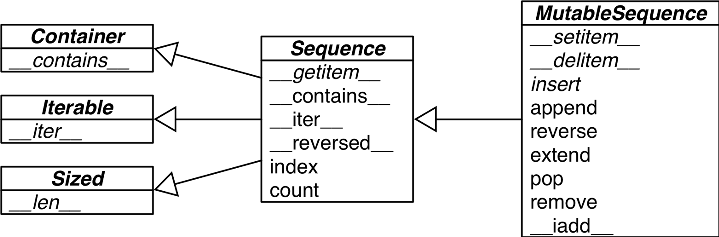

### ABCs in the Standard Library

The official documentation of collections.abc has [a nice table](https://docs.python.org/3/library/collections.abc.html#collections-abstract-base-classes) summarizing the ABCs

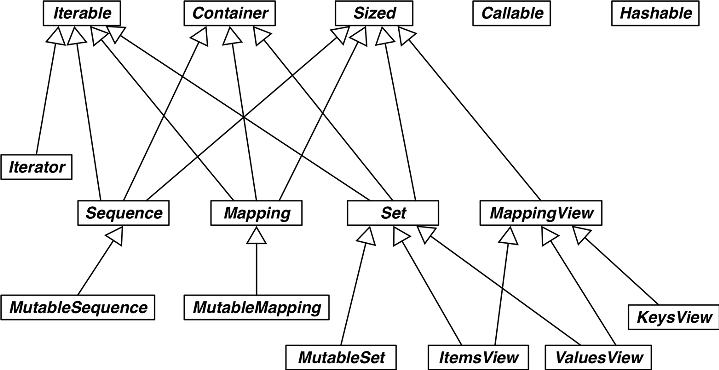

- Iterable, Container, and Sized

Every collection should either inherit from these ABCs or at least implement compatible protocols. Iterable supports iteration with \__iter\__, Container supports the in operator with \__contains\__, and Sized supports len() with \__len\__.


- Sequence, Mapping, and Set

These are the main immutable collection types, and each has a mutable subclass. A
detailed diagram for MutableSequence is in Figure 11-2; for MutableMapping and MutableSet, there are diagrams in Chapter 3 (Figures 3-1 and 3-2).


- MappingView

In Python 3, the objects returned from the mapping methods .items(), .keys(), and .values() inherit from ItemsView, ValuesView, and ValuesView, respectively.
The first two also inherit the rich interface of Set, with all the operators we saw in“Set Operations” on page 82.


- Callable and Hashable

These ABCs are not so closely related to collections, but collections.abc was the
first package to define ABCs in the standard library, and these two were deemed
important enough to be included. I’ve never seen subclasses of either Callable or Hashable. Their main use is to support the insinstance built-in as a safe way of
determining whether an object is callable or hashable.7


- Iterator

Note that iterator subclasses Iterable. We discuss this further in Chapter 14.
After the collections.abc package, the most useful package of ABCs in the standard
library is numbers, covered next.


### The Numbers Tower of ABCs

[Number](https://docs.python.org/3/library/numbers.html) 패키지는 숫자탑 이라는 것을 정의

Number 가 최상위 슈퍼클래스 
- Number
- Complex
- Real
- Rational
- Integral

정수형인지 검사해야 하는 경우 isinstance(x, number.Integral) 를 이용해서 int형, bool형(int형의 subclass), 또는 자신의 number ABC 에 등록한 정수형을 받을 수 있음

클래스를 number.Integral 의 virtual subclass 로 등록하면 해당클래스의 객체가 isinstance(x, number.Integral) 검사 됨


### Defining and Using an ABC

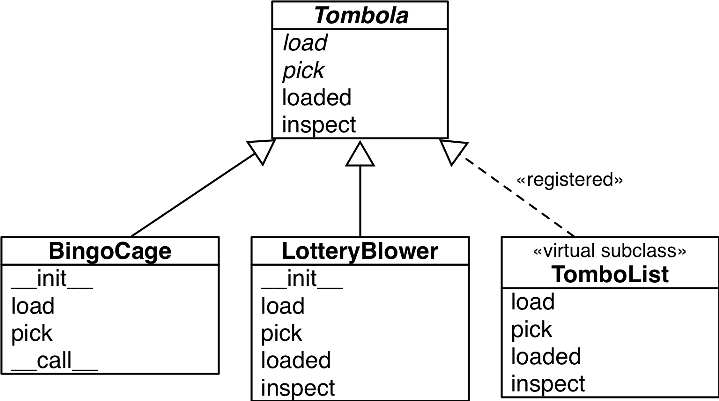

BaseException <br>
├── SystemExit <br>
├── KeyboardInterrupt <br>
├── GeneratorExit <br>
└── Exception <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;├── StopIteration <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;├── ArithmeticError <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;│ ├── FloatingPointError <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;│ ├── OverflowError <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;│ └── ZeroDivisionError <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;├── AssertionError <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;├── AttributeError <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;├── BufferError <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;├── EOFError <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;├── ImportError <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;├── LookupError <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;│ ├── IndexError <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;│ └── KeyError <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;├── MemoryError <br>
... etc.

In [20]:
import abc

class Tombola(abc.ABC):
    
    @abc.abstractmethod
    def load(self, iterable):
        """Add items from an iterable."""
        
    @abc.abstractmethod
    def pick(self):
        """Remove item at random, returning it.
        This method should raise `LookupError` when the instance is empty.
        """
        
    def loaded(self):
        """Return `True` if there's at least 1 item, `False` otherwise."""
        return bool(self.inspect())
    
    def inspect(self):
        """Return a sorted tuple with the items currently inside."""
        items = []
        while True:
            try:
                items.append(self.pick())
            except LookupError:
                break
        self.load(items)
        return tuple(sorted(items))

### ABC Syntax Details

Besides the @abstractmethod, the abc module defines the @abstractclassmethod,
@abstractstaticmethod, and @abstractproperty decorators.

@abstractmethod 위에 데코레이터를 쌓아 올릴 수 있게 되서 파이썬 3.3 부터는 사용이 중단됨 

In [23]:
class MyABC(abc.ABC):
    @classmethod
    @abc.abstractmethod
    def an_abstract_classmethod(cls):
        pass

누적되는 함수 데코레이터의 순서 중요

abstractmethod() 를 다른 메서트 디스크립터와 함께 적용할 떄는 이 데커레이터를 제일 안쪽에 위치시켜야 한다. 
```python
    @abc.abstractmethod
    def an_abstract_classmethod(cls):
```

### Subclassing the Tombola ABC

In [26]:
import random

class BingoCage(Tombola):

    def __init__(self, items):
        self._randomizer = random.SystemRandom()
        self._items = []
        self.load(items)
        
    def load(self, items):
        self._items.extend(items)
        self._randomizer.shuffle(self._items)
        
    def pick(self):
        try:
            return self._items.pop()
        except IndexError:
            raise LookupError('pick from empty BingoCage')
            
    def __call__(self):
        self.pick()

In [25]:
class LotteryBlower(Tombola):
    def __init__(self, iterable):
        self._balls = list(iterable)
        
    def load(self, iterable):
        self._balls.extend(iterable)
        
    def pick(self):
        try:
            position = random.randrange(len(self._balls))
        except ValueError:
            raise LookupError('pick from empty BingoCage')
        return self._balls.pop(position)
    
    def loaded(self):
        return bool(self._balls)
    
    def inspect(self):
        return tuple(sorted(self._balls))

self.\_balls 에는 iterable 이 아니라 list(iterable) 을 저장 (즉, self.\_balls 에 단순히 iterable 을 할당하지 않음)

이렇게 하면 어떤 반복형도 LotteryBlower 클래스를 초기화 할 수 있음, 동시에 항목들을 리스트에 저장, 꺼내 쓸 수 있음, 사본이 생성, 

### A Virtual Subclass of Tombola

goose typing 의 본질적인 기능: 어떤 클래스가 ABC 를 상속하지 않더라도 그 클래스의 virtual subclass 로 등록 가능함

ABC 의 register() 메서드를 호출하면 클래스가 등록

ABC 의 virtual subclass 가 됨 

issubclass() 와 isinstance() 함수에 의해 인식되지만, ABC 에서 상속한 메서드나 속성은 없음

virtual subclass 를 자신의 ABC 에 상속한 것이 아니고, 객체를 생성할 떄도 ABC 인터페이스를 따르는지 검사되지 않음, 런타임 오류를 피하기 위해 필요한 메서드를 실제로 모두 구현하는 것은 전적으로 subclass 역할

register() 는 데커레이터로 사용 가능 

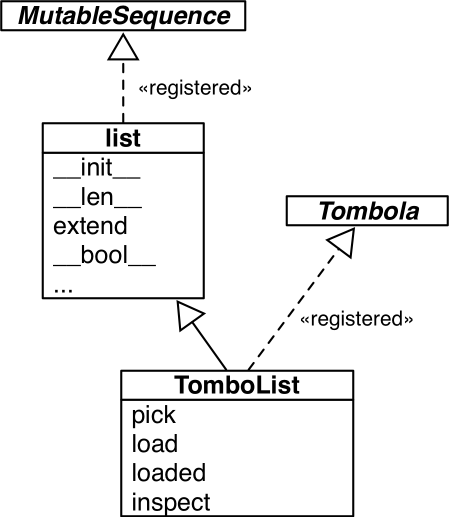

In [27]:
from random import randrange

@Tombola.register #
class TomboList(list): #
    def pick(self):
        if self: #
            position = randrange(len(self))
            return self.pop(position) #
        else:
            raise LookupError('pop from empty TomboList')
        load = list.extend #
    
    def loaded(self):
        return bool(self) #
    
    def inspect(self):
        return tuple(sorted(self))

TomboList 의 \__mro\__ 슈퍼클래스 나열 

In [28]:
TomboList.__mro__

(__main__.TomboList, list, object)

Tombola 라 없음으로 마무런 메서드도 상속하지 않음 

### How the Tombola Subclasses Were Tested

계층구조를 조사할 수 있는 두가지 클래스 속성

- \__subclasses\__()

Method that returns a list of the immediate subclasses of the class. The list does not include virtual subclasses.

- \_abc_registry

Data attribute—available only in ABCs—that is bound to a WeakSet with weak references to registered virtual subclasses of the abstract class.
To test all Tombola subclasses, I wrote a script to iterate over a list built

### Usage of register in Practice

register() 데코레이터보다 다른곳에서 정의된 클래스를 등록하기 위해 함수 형태로 사용하는 경우가 많음 

collections.abc 에 대한 [소스코드](https://hg.python.org/cpython/file/3.4/Lib/_collections_abc.py)

tuple, str, range, memoryview 내장 자료형이 Sequence 의 virtual subclass 로 등록 되어 있음 

Sequence.register(tuple) <br>
Sequence.register(str)<br>
Sequence.register(range)<br>
Sequence.register(memoryview)<br>

### Geese Can Behave as Ducks

In [4]:
from collections import abc
from abc import ABCMeta, abstractmethod

class Sized(metaclass=ABCMeta):
    __slots__=()
   
    @abstractmethod
    def __len__(self):
        return 0
    
    @classmethod
    def __subclasshook__(cls, C):
        if cls is Sized:
            #c.__mro__ 에 나열된 클래스 (c 와 c의 슈퍼클래스) 중 
            #__dict__ 속성에 __ren__ 이라는 속성을 가니클래스가 하나라도 있으면 
            if any("__len__" in B.__dict__ for B in C.__mro__): 
                return True # C 가 Sized 의 가상 서브클래스 임을 알려준다. 
        return NotImplemented #

서브클래스 검사: Lib/abc.py https://hg.python.org/cpython/file/3.4/Lib/abc.py#194

\__subclasshook\__() 은 구스타이핑에 약간의 덕타이핑 유전자를 추가

ABC 를 이용해서 공식적으로 인터페이스를 정의할 수 있고 어디서에서든 isinstance() 검사를 할 수 있고, 어떤 메서드를 구현하기만 하면 (혹은 \__subclasshook\__() 이 보증하게 만드는 어떤일이든 수행하면) 전혀 상관없는 클래스들이 함께 어울리게 만들수 있다. 

프로토콜이라고 불리는 비공식 인터페이스의 상당히 동적인 성질 

인터페이스는 스몰토크의 프로토콜처러머 비공식적

프로토콜 유형의 인터페이스는 각 클래스가 독립적으로 프로토콜을 구현하기 때문에 상속과는 아무런 관련이 없음

가변 시퀀스 프로토콜의 \__setitem\__() 만 추가하면 표준 라이브러리가 제공하는 random.shuffle() 을 사용 가능

더그 헬먼 [금주의 파이썬 모듈](http://pymotw.com)

추상베이스 클래스를 정의함으로써 일련의 서브클래스에 대한 공통된 API 를 규정할 수 있다. 이 기능은 특히 애플리케이션 소스코드에 익숙지 않은 사람들이 플러그인 확장을 제공하려 할때 유용하다.

구상서브클래스 구현: 두개는 Tombola 를 상속하고, 나머지 하나는 Tombola 에 등록한 가상서브클래스


[PEP 3119 — Introducing Abstract Base Classes](https://www.python.org/dev/peps/pep-3119/) gives the rationale for ABCs, and [PEP
3141 - A Type Hierarchy for Numbers](https://www.python.org/dev/peps/pep-3141/) presents the ABCs of [the numbers module](https://docs.python.org/3/library/numbers.html).

the pros and cons of dynamic typing 

Guido van Rossum’s interview to Bill Venners in [Contracts in Python: A Conversation with Guido van Rossum,Part IV](https://www.artima.com/intv/pycontract.html)

- Strong versus weak typing

If the language rarely performs implicit conversion of types, it’s considered strongly typed; if it often does it, it’s weakly typed. Java, C++, and Python are strongly typed.
PHP, JavaScript, and Perl are weakly typed.

- Static versus dynamic typing

If type-checking is performed at compile time, the language is statically typed; if it happens at runtime, it’s dynamically typed. Static typing requires type declarations
(some modern languages use type inference to avoid some of that). Fortran and Lisp are the two oldest programming languages still alive and they use, respectively, static and dynamic typing.

파이썬은 자료형을 동적으로 강하게 검사함

Alan Cooper writes in About Face, 4E (Wiley):
    
Strict adherence to metaphors ties interfaces unnecessarily tightly to the workings of the physical world.